In [171]:
import numpy as np
import pandas as pd
import seaborn as sb
import missingno as msno
import matplotlib.pyplot as plt
import autoreload
import csv
import os
import sys

from collections import defaultdict, Counter
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.despine()
sb.set_style("dark")

<Figure size 432x288 with 0 Axes>

In [172]:
df = pd.read_csv(r"D:\Open Classroom\Data Files\adult\adult.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   object
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   object
 3   education       5000 non-null   object
 4   education_num   5000 non-null   object
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  income          5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB


In [174]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [175]:
df.shape

(5000, 15)

In [176]:
df.dropna(axis = "index", how = "any")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,#NAME?,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [177]:
#ind = df != "#NAME?"
df.replace("#NAME?", np.nan, inplace = True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,NaN,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,NaN,Private,245880,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [178]:
df = df.dropna(axis = "index", how = "any")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,39,Private,214816,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,<=50K
4995,43,Private,222971,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K


In [179]:
df.shape

(4496, 15)

In [180]:
df.describe().round()

,capital_gain,capital_loss,hours_per_week
count,4496.0,4496.0,4496.0
mean,1076.0,92.0,41.0
std,7257.0,407.0,12.0
min,0.0,0.0,1.0
25%,0.0,0.0,40.0
50%,0.0,0.0,40.0
75%,0.0,0.0,45.0
max,99999.0,2547.0,99.0


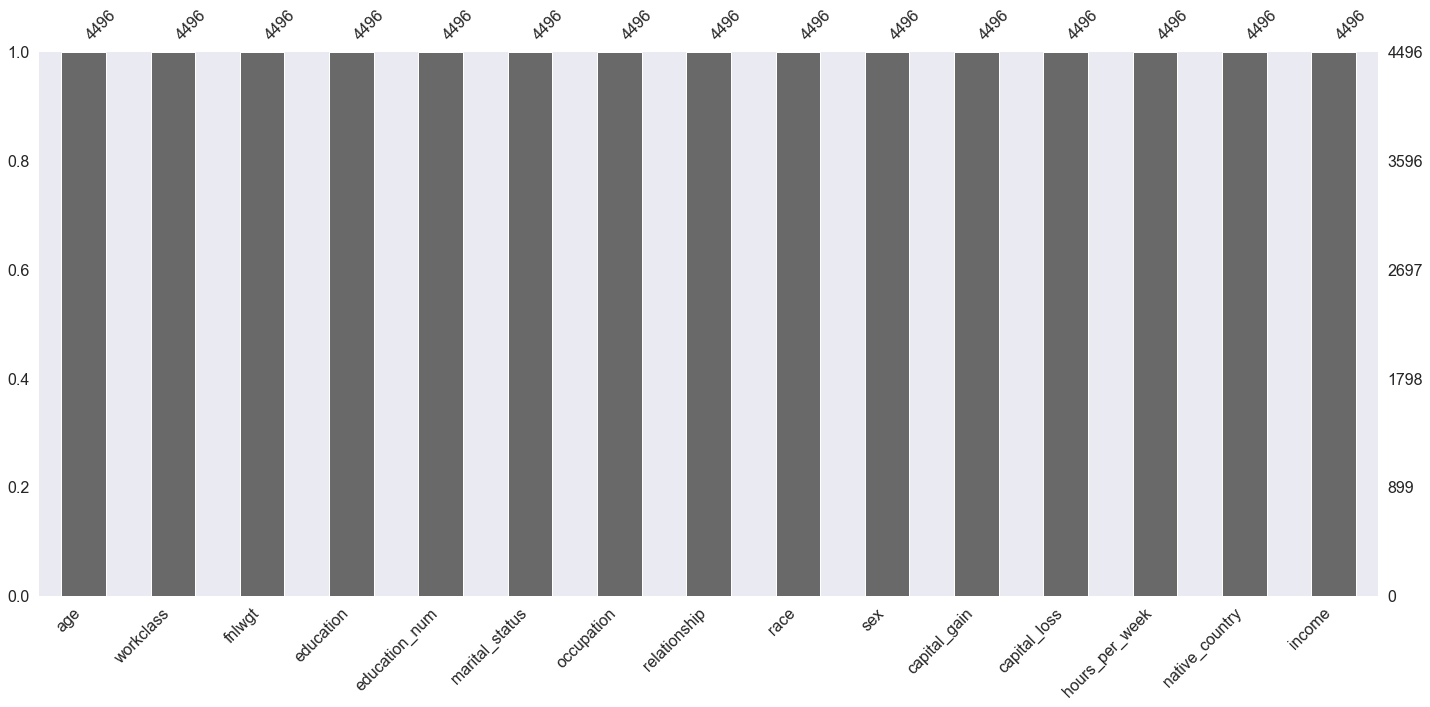

In [181]:
msno.bar(df.isnull())

In [182]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [183]:
df["workclass"].value_counts()

Private             3093
Self-emp-not-inc     349
Local-gov            299
?                    293
State-gov            170
Self-emp-inc         162
Federal-gov          129
Without-pay            1
Name: workclass, dtype: int64

In [184]:
df["age"] = df["age"].astype("int64")
df.head()

<ipython-input-184-e891a6998c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["age"].astype("int64")


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
